In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# This function reads the data files named as the string given as parameter.
# Also, it applies some filters to remove null data and unwanted rows and columns.
# Then the function return the two dataframes the fist one with years as columns 
# the second one with countries as columns.
def read_and_prepare_dataframes(csv_path):
    #df1 = pd.read_csv('electricity.csv')
    df1 = pd.read_csv(csv_path,skiprows = 3)
    
    df1 = df1.dropna(how='all',subset=['1995'])
    df1 = df1.dropna(axis=1,how='any')
    
    df1 = df1.drop(df1.columns[[0,2,3]],axis=1)
    df1 = df1.set_index("Country Code")
    df2 = df1.T
    return df1,df2

In [3]:
# This function takes two dataframes as parameters then it removes all elements that their indices
# don't exist in both dataframes and return them after the removal.
def UnionByIndex(df1,df2):
    union = set(df1.index.tolist()) & set(df2.index.tolist())
    ldf1 = df1[df1.index.isin(union)]
    ldf2 = df2[df2.index.isin(union)]
    return a,b

In [4]:
# This function takes four parameters: a dataframe, a list of strings contians countries codes, 
# a string to what x axis represent, a string to what y axis represent.
# Using the data from the dataframe, the function displays a line plot with 
# the given countries and world average.
def LinePlot(df, countries, Xaxis, Yaxis):
    ldf = df.drop(index='WLD').stack()
    ldf2 = ldf.loc[countries]
    ldf = ldf.reset_index().rename(columns={"level_1":Xaxis, 0: Yaxis})
    ldf2 = ldf2.reset_index().rename(columns={"level_1":Xaxis, 0: Yaxis})
    
    sb.lineplot(data = ldf, x=Xaxis, y=Yaxis)
    plt.xticks(['1995', '2000', '2005', '2010', '2015'])

    sb.lineplot(data = ldf2, x=Xaxis, y=Yaxis, hue='Country Code', palette="rocket")
    plt.show()

In [5]:
# This function takes two dataframes as parameters and a list of strings contians countries codes, 
# Using the data from the dataframes, the function displays a scatter plot with 
# the given countries.
def ScatterPlot(df1, df2, countries):
    ldf1 = df1.loc[countries]
    ldf2 = df2.loc[countries]
    
    for x in countries:
        sb.relplot(x=ldf1.loc[x], y=ldf2.loc[x], kind='scatter')
        plt.xlabel('kWh per capita')
        plt.ylabel('CO2')
        plt.title(x)
    plt.show()

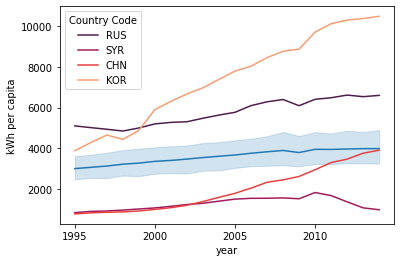

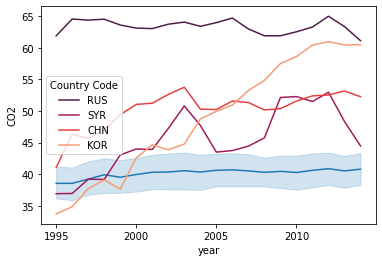

In [6]:
# read and prepare dataframes
elec,elec_t = read_and_prepare_dataframes('electricity.csv')
co2,co2_t = read_and_prepare_dataframes('co2.csv')
# remove all elements that their indices don't exist in both dataframes
elec,co2 = UnionByIndex(df1=elec,df2=co2)
countries = ['RUS', 'SYR', 'CHN','KOR']
# display the line plot of the first data set
LinePlot(df = elec, countries = countries, Xaxis = 'year', Yaxis = 'kWh per capita')
# display the line plot of the second data set
LinePlot(df = co2, countries = countries, Xaxis = 'year', Yaxis = 'CO2')

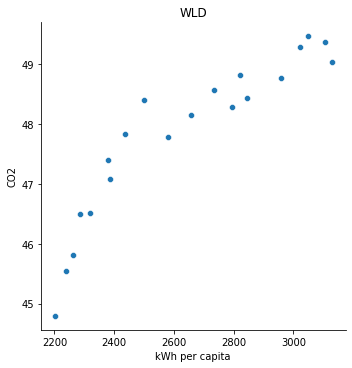

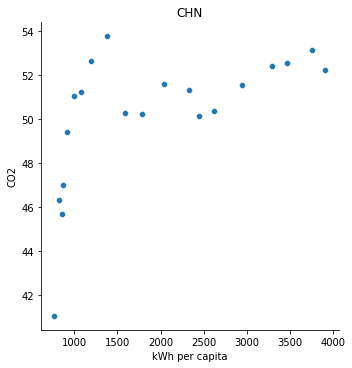

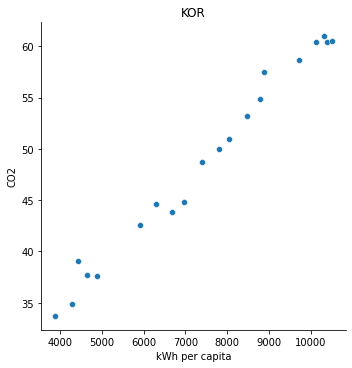

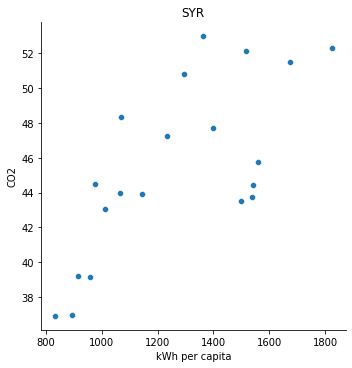

In [7]:
countries = ['WLD', 'CHN','KOR','SYR']
# display the scatter plot for each elemnt in countries
ScatterPlot(elec,co2,countries)